# Unit 5 - Financial Planning

In [1]:
# Initial imports
import requests
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'MCForecastTools'

In [ ]:
load_dotenv() # Load .env enviroment variables

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50738.40
The current value of your 5.3 ETH is $15957.77


In [55]:
print(f"${btc_price:,.2F}")
print(f"${eth_price:,.2F}")

$42,282.00
$3,010.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [9]:
current_date = pd.Timestamp("today", tz="America/Chicago").isoformat()

In [10]:
# def parse_date(current_date=None):
#     if current_date == None:
#         current_date = current_date=pd.Timestamp("today", tz="America/Chicago").isoformat()
    
#     current_year = current_date[0:4]
#     current_month = current_date[5:7]
#     current_day = current_date[8:10]
#     # current_day
#     return [current_year,current_month,current_day,current_date]

In [11]:
def get_dates(delta=1000, time_unit='day'):
    current_date = pd.Timestamp("today", tz="America/Chicago")
    start_date = current_date - pd.to_timedelta(delta, unit=time_unit)
    start_date_str = f"{start_date.year}-{start_date.month:02}-{start_date.day:02}"
    end_date_str = f"{current_date.year}-{current_date.month:02}-{current_date.day:02}"
    
    dates = {
        # 'current_date': current_date,
        'start_date_str': start_date_str,
        'end_date_str': end_date_str
    }
    return dates

In [12]:
delta = 5 * 365
my_date_str = get_dates(delta,'d')

In [13]:
start_date_str = my_date_str['start_date_str']
end_date_str = my_date_str['end_date_str']

In [14]:
print(start_date_str)
print(end_date_str)

2017-03-22
2022-03-21


In [17]:
api = REST(key_id = alpaca_api_key, secret_key = alpaca_secret_key)

In [19]:
tickers = ["AGG", "SPY"]

In [20]:
df = api.get_bars(tickers, tradeapi.TimeFrame(1, tradeapi.TimeFrameUnit.Day), start_date_str).df

In [21]:
df_stock_data = df.copy() # backup

In [22]:
df # Preview DataFrame

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-22 04:00:00+00:00,108.44,108.54,108.3600,108.42,2643641,11111,108.455049,AGG
2017-03-23 04:00:00+00:00,108.44,108.51,108.2635,108.45,2071485,10901,108.417635,AGG
2017-03-24 04:00:00+00:00,108.35,108.51,108.3100,108.36,3374871,11229,108.398485,AGG
2017-03-27 04:00:00+00:00,108.65,108.71,108.5345,108.62,1977292,11112,108.600681,AGG
2017-03-28 04:00:00+00:00,108.63,108.68,108.3500,108.37,2016097,9144,108.514754,AGG
...,...,...,...,...,...,...,...,...
2022-03-15 04:00:00+00:00,419.90,426.84,418.4200,426.17,104219651,920659,422.752423,SPY
2022-03-16 04:00:00+00:00,429.94,435.68,424.8000,435.62,138130298,1344164,431.339744,SPY
2022-03-17 04:00:00+00:00,433.70,441.07,433.1900,441.07,100157174,784018,437.706981,SPY


In [24]:
agg = df_stock_data.loc[df['symbol'] == 'AGG']
agg = agg.drop(['trade_count','vwap', 'symbol'], axis=1)
agg

,open,high,low,close,volume
timestamp,,,,,
2017-03-22 04:00:00+00:00,108.44,108.540,108.3600,108.42,2643641
2017-03-23 04:00:00+00:00,108.44,108.510,108.2635,108.45,2071485
2017-03-24 04:00:00+00:00,108.35,108.510,108.3100,108.36,3374871
2017-03-27 04:00:00+00:00,108.65,108.710,108.5345,108.62,1977292
2017-03-28 04:00:00+00:00,108.63,108.680,108.3500,108.37,2016097
...,...,...,...,...,...
2022-03-15 04:00:00+00:00,107.83,107.920,107.4300,107.60,13841071
2022-03-16 04:00:00+00:00,107.63,107.730,107.0032,107.68,15809171
2022-03-17 04:00:00+00:00,107.87,108.060,107.7300,107.86,8005258


In [25]:
spy = df_stock_data.loc[df['symbol'] == 'SPY']
spy = spy.drop(['trade_count','vwap', 'symbol'], axis=1)
spy

,open,high,low,close,volume
timestamp,,,,,
2017-03-22 04:00:00+00:00,233.78,234.61,233.05,234.250,97569204
2017-03-23 04:00:00+00:00,234.01,235.34,233.60,233.940,100410277
2017-03-24 04:00:00+00:00,234.35,235.04,232.96,233.880,112504853
2017-03-27 04:00:00+00:00,231.97,233.92,231.61,233.575,87454452
2017-03-28 04:00:00+00:00,233.29,235.81,233.14,235.260,93483915
...,...,...,...,...,...
2022-03-15 04:00:00+00:00,419.90,426.84,418.42,426.170,104219651
2022-03-16 04:00:00+00:00,429.94,435.68,424.80,435.620,138130298
2022-03-17 04:00:00+00:00,433.70,441.07,433.19,441.070,100157174


In [26]:
# Pick AGG and SPY close prices
agg_close_price = agg.iloc[-1]['close']
spy_close_price = spy.iloc[-1]['close']

In [27]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.3f}")
print(f"Current SPY closing price: ${spy_close_price:.3f}")

Current AGG closing price: $107.040
Current SPY closing price: $444.390


In [28]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $22,219.50
The current value of your 200 AGG shares is $21,408.00


### Savings Health Analysis

In [29]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_spy_value + my_agg_value

assets = ['crypto','shares']

value_data ={
    'amount ($)': [my_crypto_value,my_shares_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=assets)
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount ($)
crypto,66696.17
shares,43627.50


<AxesSubplot:title={'center':'Distribution of Savings'}, ylabel='amount ($)'>

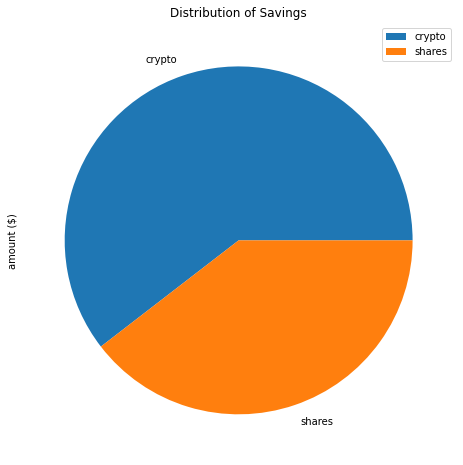

In [30]:
# Plot savings pie chart
df_savings.plot.pie(y='amount ($)', title="Distribution of Savings", figsize=(8,8))

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(value_data['amount ($)'])

print("An ideal emergency fund should be equal to 3 times your monthly income.\n")

print(f"\tSavings goal: ${emergency_fund:,.2f}\n")

# Validate saving health
if total_savings > emergency_fund:
    print(f"\tCongratulations! You have enough money in this fund. You have exceeded the goal by ${total_savings - emergency_fund:,.2f}.")
elif total_savings == emergency_fund:
    print("\tCongratulations, you have met your financial goal.")
else:
    print(f"\tYou are ${(emergency_fund - total_savings):,2.f} away from your goal.")

An ideal emergency fund should be equal to 3 times your monthly income.

	Savings goal: $36,000.00

	Congratulations! You have enough money in this fund. You have exceeded the goal by $74,323.67.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
get_dates()

{'start_date_str': '2019-06-25', 'end_date_str': '2022-03-21'}

In [37]:
df = pd.concat([agg,spy], axis = 1, keys=['agg','spy'])
df.dropna(inplace=True)

In [38]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df.copy(),
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [39]:
# Printing the simulation input data
MC_even_dist.portfolio_data

agg                                       \
                             open     high       low   close    volume   
timestamp                                                                
2017-03-22 04:00:00+00:00  108.44  108.540  108.3600  108.42   2643641   
2017-03-23 04:00:00+00:00  108.44  108.510  108.2635  108.45   2071485   
2017-03-24 04:00:00+00:00  108.35  108.510  108.3100  108.36   3374871   
2017-03-27 04:00:00+00:00  108.65  108.710  108.5345  108.62   1977292   
2017-03-28 04:00:00+00:00  108.63  108.680  108.3500  108.37   2016097   
...                           ...      ...       ...     ...       ...   
2022-03-15 04:00:00+00:00  107.83  107.920  107.4300  107.60  13841071   
2022-03-16 04:00:00+00:00  107.63  107.730  107.0032  107.68  15809171   
2022-03-17 04:00:00+00:00  107.87  108.060  107.7300  107.86   8005258   
2022-03-18 04:00:00+00:00  107.95  108.140  107.9203  108.10   7800354   
2022-03-21 04:00:00+00:00  107.60  107.649  106.9841  107.04   7583668   

                                           spy                           \
                          daily_return    open    high     low    close   
timestamp                                                                 
2017-03-22 04:00:00+00:00          NaN  233.78  234.61  233.05  234.250   
2017-03-23 04:00:00+00:00     0.000277  234.01  235.34  233.60  233.940   
2017-03-24 04:00:00+00:00    -0.000830  234.35  235.04  232.96  233.880   
2017-03-27 04:00:00+00:00     0.002399  231.97  233.92  231.61  233.575   
2017-03-28 04:00:00+00:00    -0.002302  233.29  235.81  233.14  235.260   
...                                ...     ...     ...     ...      ...   
2022-03-15 04:00:00+00:00     0.002235  419.90  426.84  418.42  426.170   
2022-03-16 04:00:00+00:00     0.000743  429.94  435.68  424.80  435.620   
2022-03-17 04:00:00+00:00     0.001672  433.70  441.07  433.19  441.070   
2022-03-18 04:00:00+00:00     0.002225  438.20  444.86  437.22  444.520   
2022-03-21 04:00:00+00:00    -0.009806  444.45  446.46  440.68  444.390   

                                                   
                              volume daily_return  
timestamp                                          
2017-03-22 04:00:00+00:00   97569204          NaN  
2017-03-23 04:00:00+00:00  100410277    -0.001323  
2017-03-24 04:00:00+00:00  112504853    -0.000256  
2017-03-27 04:00:00+00:00   87454452    -0.001304  
2017-03-28 04:00:00+00:00   93483915     0.007214  
...                              ...          ...  
2022-03-15 04:00:00+00:00  104219651     0.021990  
2022-03-16 04:00:00+00:00  138130298     0.022174  
2022-03-17 04:00:00+00:00  100157174     0.012511  
2022-03-18 04:00:00+00:00  102327793     0.007822  
2022-03-21 04:00:00+00:00   85377983    -0.000292  

[1259 rows x 12 columns]

In [40]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996443,0.992949,0.998450,0.984140,1.001663,0.999082,1.004005,0.986986,0.995080,0.996148,...,1.003016,0.997024,0.995887,0.999555,0.994729,0.999222,1.007346,0.995499,0.989384,0.997573
2,0.992261,0.995253,0.995496,0.978942,0.991949,0.998270,1.012877,0.991477,0.999535,0.990694,...,1.015993,1.002823,0.993241,0.994366,0.987297,0.993873,1.006153,0.989938,0.986161,0.996506
3,1.008778,0.986787,1.005201,0.969635,0.996446,0.987661,1.014766,0.991850,1.001005,0.995713,...,1.015324,1.002040,0.996543,0.994061,0.995537,0.987098,1.008991,0.983650,0.984928,1.005456
4,1.007453,0.990864,0.996618,0.972297,1.005870,0.979295,1.023046,0.995505,1.011998,0.996997,...,1.012256,1.006072,1.006790,0.999679,1.000970,0.993900,0.998223,0.975108,0.978367,1.002932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.984695,1.583488,0.949326,1.209424,1.975424,1.249573,1.195026,1.163670,1.174627,1.431017,...,0.939312,1.669073,0.847699,1.330875,1.485042,1.181303,1.233285,0.794608,1.540534,1.587667
1257,0.976028,1.587530,0.952632,1.198581,1.964891,1.251263,1.191014,1.168394,1.177664,1.423418,...,0.941086,1.665103,0.847556,1.339739,1.473260,1.189951,1.225273,0.792757,1.543912,1.586887
1258,0.989435,1.587463,0.945655,1.200043,1.969617,1.243564,1.183907,1.182708,1.176745,1.423012,...,0.939031,1.667600,0.852932,1.347717,1.466566,1.173499,1.240455,0.785831,1.552385,1.599094
1259,0.987812,1.596475,0.941111,1.202697,1.981362,1.246663,1.187240,1.193632,1.184249,1.431342,...,0.939426,1.674160,0.860010,1.353556,1.442150,1.171730,1.253251,0.779261,1.540017,1.625377


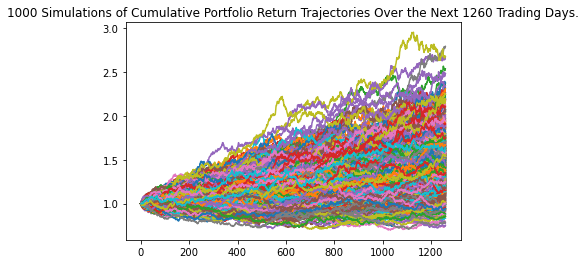

In [41]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

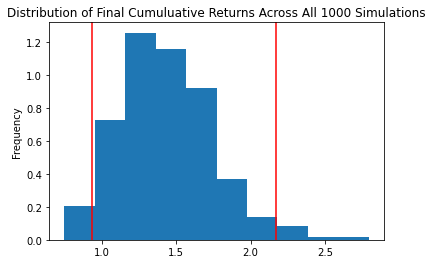

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.433560
std                0.313269
min                0.747126
25%                1.200011
50%                1.417970
75%                1.619999
max                2.794555
95% CI Lower       0.932543
95% CI Upper       2.171152
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $18,650.87 and $43,423.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [45]:
# Set initial investment
initial_investment = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30000.00 in the portfolio over the next 30 years will end within in the range of $27,976.30 and $65,134.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [47]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [48]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [49]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [52]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 5 years will end within in the range of"
#       f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [53]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 10 years will end within in the range of"
#       f" ${ci_lower_ten} and ${ci_upper_ten}")